In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from model import *
from data import *
from analysis import *

In [3]:
oiii = for_oiii()
oiii_ = oiii[oiii["loglbol"] > 46]
oiii_res = np.loadtxt("../output/oiii.res")

cond_oiii = (oiii_res[:,3] > -0.5) & (oiii_res[:,-2] < 50)
oiii_ = oiii_[cond_oiii]
oiii_res = oiii_res[cond_oiii]

initial: 105783
select redshift: 19083
select wise: 15666


In [11]:
extinction = -oiii_res[:,3]

In [13]:
logcfs = np.array([analysis_(i, 12) for i in oiii_res])
cors = [parcor([logew, logcfs[:,i], loglbol, logbh])[0,1] for i in range(50)]

cond = extinction < 0
cors_low_av = [parcor([logew[cond], logcfs[cond,i], loglbol[cond], logbh[cond]])[0,1] for i in range(50)]


In [18]:
logew_hb = np.log10(oiii_["ew_broad_hb"])
cond_hb = oiii_["ew_broad_hb"] > 0

<ipython-input-18-4a09a4ad1fba>:1: RuntimeWarning: divide by zero encountered in log10
  logew_hb = np.log10(oiii_["ew_broad_hb"])


In [26]:
cors_hb_low_av = [parcor([logew_hb[cond_hb & cond], logcfs[cond_hb & cond,i], loglbol[cond_hb & cond], logbh[cond_hb & cond]])[0,1] for i in range(50)]

In [85]:
def single_bootstrap():
    ind = np.random.choice(np.arange(len(oiii_[cond_hb])), len(oiii_[cond_hb]))

    return [parcor([logew[cond_hb][ind], logcfs[cond_hb,i][ind], loglbol[cond_hb][ind], logbh[cond_hb][ind]])[0,1] for i in range(50)]

def single_bootstrap_low_av():
    ind = np.random.choice(np.arange(len(oiii_[cond_hb & cond])), len(oiii_[cond_hb & cond]))

    return [parcor([logew_hb[cond_hb & cond][ind], logcfs[cond_hb & cond,i][ind], loglbol[cond_hb & cond][ind], logbh[cond_hb & cond][ind]])[0,1] for i in range(50)]

In [86]:
cors_hb_err = np.std([single_bootstrap() for i in range(100)], axis=0)
cors_hb_low_av_err = np.std([single_bootstrap_low_av() for i in range(100)], axis=0)

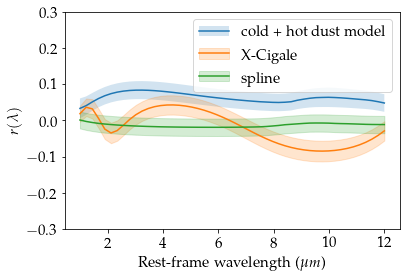

In [182]:
xx = np.linspace(1,12)
a = plot_with_err(xx, cors_hb, cors_hb_err)
# b = plot_with_err(xx, cors_hb_low_av, cors_hb_low_av_err, color="tab:orange")

c = plot_with_err(xx, cors_hb_s, cors_hb_s_err, color="tab:orange")
# d = plot_with_err(xx, cors_hb_low_av_s, cors_hb_low_av_s_err, color="tab:orange", linestyle="--")

e = plot_with_err(xx, cors_hb_x, cors_hb_x_err, color="tab:green")
# f = plot_with_err(xx, cors_hb_low_av_x, cors_hb_low_av_x_err, color="tab:orange", linestyle="dotted")

# plt.plot(xx, cors, color="tab:gray", linestyle="dotted")
# plt.plot(xx, cors_s, color="tab:gray", linestyle="-.")
# plt.plot(xx, cors_x, color="tab:gray", linestyle="--")

plt.legend([a, c, e], ["cold + hot dust model", "X-Cigale", "spline"])

plt.xlabel("Rest-frame wavelength ($\mu m$)")
plt.ylabel("$r(\lambda)$")

plt.ylim((-0.3,0.3))

plt.savefig("/Users/wul/Desktop/Hb.pdf", bbox_inches="tight")

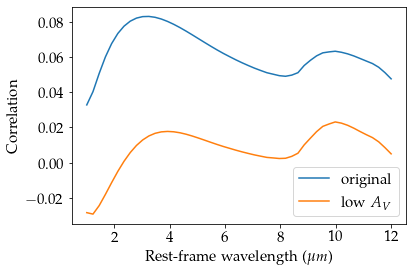

In [29]:
plt.plot(np.linspace(1,12), cors_hb, label="original")
plt.plot(np.linspace(1,12), cors_hb_low_av, label="low $A_V$")

plt.xlabel("Rest-frame wavelength ($\mu m$)")
plt.ylabel("Correlation")
plt.legend()

plt.savefig("/Users/wul/Desktop/hb_broad.pdf", bbox_inches="tight")

In [119]:
cors_ext = [np.corrcoef([extinction, logcfs[:,i]])[0,1] for i in range(50)]
cors_ext_s = [np.corrcoef([extinction, oiii_ans_s[:,i]])[0,1] for i in range(50)]
cors_ext_x = [np.corrcoef([extinction, np.log10(oiii_ans_x[:,i])])[0,1] for i in range(50)]

cors_ext_ = [parcor([extinction, logcfs[:,i], loglbol])[0,1] for i in range(50)]
cors_ext_s_ = [parcor([extinction, oiii_ans_s[:,i], loglbol_s])[0,1] for i in range(50)]
cors_ext_x_ = [parcor([extinction, np.log10(oiii_ans_x[:,i]), loglbol_x])[0,1] for i in range(50)]

In [122]:
def single_bootstrap_ext():
    ind = np.random.choice(np.arange(len(extinction)), len(extinction))

    return [np.corrcoef([extinction[ind], logcfs[ind,i]])[0,1] for i in range(50)]

def single_bootstrap_ext_s():
    ind = np.random.choice(np.arange(len(extinction)), len(extinction))

    return [np.corrcoef([extinction[ind], oiii_ans_s[ind,i]])[0,1] for i in range(50)]

def single_bootstrap_ext_x():
    ind = np.random.choice(np.arange(len(extinction)), len(extinction))

    return [np.corrcoef([extinction[ind], np.log10(oiii_ans_x[ind,i])])[0,1] for i in range(50)]


def single_bootstrap_ext_():
    ind = np.random.choice(np.arange(len(extinction)), len(extinction))

    return [parcor([extinction[ind], logcfs[ind,i], loglbol[ind]])[0,1] for i in range(50)]

def single_bootstrap_ext_s_():
    ind = np.random.choice(np.arange(len(extinction)), len(extinction))

    return [np.corrcoef([extinction[ind], oiii_ans_s[ind,i], loglbol_s[ind]])[0,1] for i in range(50)]

def single_bootstrap_ext_x_():
    ind = np.random.choice(np.arange(len(extinction)), len(extinction))

    return [np.corrcoef([extinction[ind], np.log10(oiii_ans_x[ind,i]), loglbol_x[ind]])[0,1] for i in range(50)]

In [123]:
cors_ext_err = np.std([single_bootstrap_ext() for i in range(100)], axis=0)
cors_ext_s_err = np.std([single_bootstrap_ext_s() for i in range(100)], axis=0)
cors_ext_x_err = np.std([single_bootstrap_ext_x() for i in range(100)], axis=0)

cors_ext_err_ = np.std([single_bootstrap_ext_() for i in range(100)], axis=0)
cors_ext_s_err_ = np.std([single_bootstrap_ext_s_() for i in range(100)], axis=0)
cors_ext_x_err_ = np.std([single_bootstrap_ext_x_() for i in range(100)], axis=0)

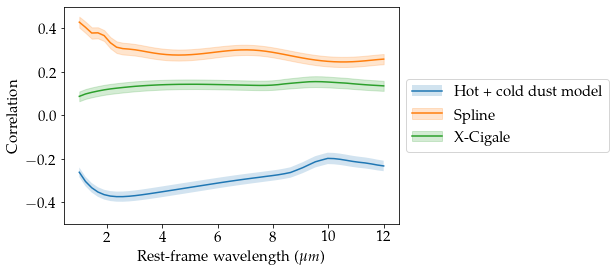

In [118]:
xx = np.linspace(1,12)
a = plot_with_err(xx, cors_ext, cors_ext_err)
b = plot_with_err(xx, cors_ext_s, cors_ext_s_err, color="tab:orange")
c = plot_with_err(xx, cors_ext_x, cors_ext_x_err, color="tab:green")
plt.ylim((-0.5, 0.5))

plt.legend([a, b, c], ["Hot + cold dust model", "Spline", "X-Cigale"], loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Rest-frame wavelength ($\mu m$)")
plt.ylabel("Correlation")

plt.savefig("/Users/wul/Desktop/corr_av_cfs.pdf", bbox_inches="tight")

(<matplotlib.lines.Line2D at 0x14b6912b0>,
 <matplotlib.collections.PolyCollection at 0x14b691730>)

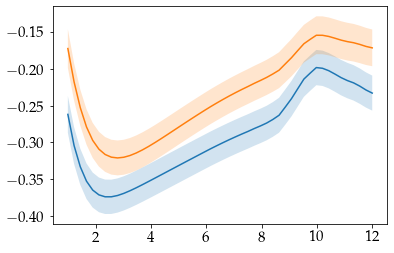

In [125]:
plot_with_err(xx, cors_ext, cors_ext_err)
plot_with_err(xx, cors_ext_, cors_ext_err_)

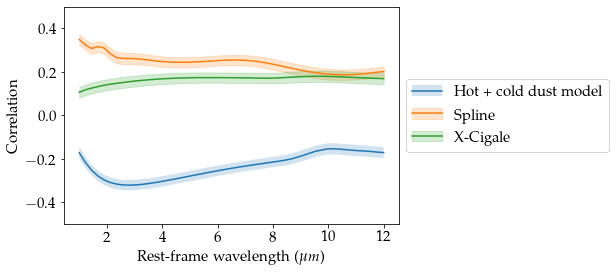

In [124]:
xx = np.linspace(1,12)
a = plot_with_err(xx, cors_ext_, cors_ext_err_)
b = plot_with_err(xx, cors_ext_s_, cors_ext_s_err_, color="tab:orange")
c = plot_with_err(xx, cors_ext_x_, cors_ext_x_err_, color="tab:green")
plt.ylim((-0.5, 0.5))

plt.legend([a, b, c], ["Hot + cold dust model", "Spline", "X-Cigale"], loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Rest-frame wavelength ($\mu m$)")
plt.ylabel("Correlation")

plt.savefig("/Users/wul/Desktop/corr_av_cfs_partial.pdf", bbox_inches="tight")

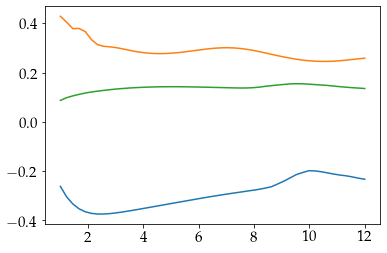

In [105]:
plt.plot(xx, cors_ext)
plt.plot(xx, cors_ext_s)
plt.plot(xx, cors_ext_x)

In [32]:
from scipy.interpolate import CubicSpline

In [30]:
def analysis_spline(i):
    s = oiii_[i]
    rsr, wavelength, lum, lum_unc = prepare_data(s)
    spline = CubicSpline(wavelength, lum)
    return [np.log10(spline(0.3)), np.log10(spline(np.linspace(1, 12))) - np.log10(spline(0.3))]

In [44]:
res_s = [analysis_spline(i) for i in range(len(oiii_))]

oiii_ans_s = np.array([r[1] for r in res_s])
loglbol_s = np.array([r[0] for r in res_s])

In [63]:
cors_hb_s = [parcor([np.log10(oiii_[cond_hb]["ew_broad_hb"]), oiii_ans_s[cond_hb,i], loglbol_s[cond_hb], oiii_[cond_hb]["logbh_hb_vp06"]])[0,1]
for i in range(50)]

cors_hb_low_av_s = [parcor([np.log10(oiii_[cond_hb & cond]["ew_broad_hb"]), oiii_ans_s[cond_hb & cond,i], loglbol_s[cond_hb & cond], oiii_[cond_hb & cond]["logbh_hb_vp06"]])[0,1]
for i in range(50)]

In [65]:
def single_bootstrap_s():
    ind = np.random.choice(np.arange(len(oiii_[cond_hb])), len(oiii_[cond_hb]))

    return [parcor([np.log10(oiii_[cond_hb]["ew_broad_hb"][ind]), oiii_ans_s[cond_hb,i][ind], loglbol_s[cond_hb][ind], oiii_[cond_hb]["logbh_hb_vp06"][ind]])[0,1]
for i in range(50)]

In [71]:
def single_bootstrap_low_av_s():
    ind = np.random.choice(np.arange(len(oiii_[cond_hb & cond])), len(oiii_[cond_hb & cond]))

    return [parcor([np.log10(oiii_[cond_hb & cond]["ew_broad_hb"][ind]), oiii_ans_s[cond_hb & cond,i][ind], loglbol_s[cond_hb & cond][ind], oiii_[cond_hb & cond]["logbh_hb_vp06"][ind]])[0,1]
for i in range(50)]

In [73]:
cors_hb_s_err = np.std([single_bootstrap_s() for i in range(100)], axis=0)

In [74]:
cors_hb_low_av_s_err = np.std([single_bootstrap_low_av_s() for i in range(100)], axis=0)

In [92]:
def plot_with_err(x, y, err, ax=plt, linestyle=None, **kwargs):
    line, = ax.plot(x, y, linestyle=linestyle, **kwargs)
    error = ax.fill_between(x, y + err, y - err, **kwargs, alpha=0.2)
    return line, error

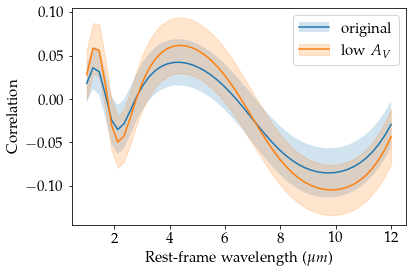

In [82]:
xx = np.linspace(1,12)
a = plot_with_err(xx, cors_hb_s, cors_hb_s_err)

b = plot_with_err(xx, cors_hb_low_av_s, cors_hb_low_av_s_err, color="tab:orange")

plt.legend([a, b], ["original", "low $A_V$"])

plt.xlabel("Rest-frame wavelength ($\mu m$)")
plt.ylabel("Correlation")

plt.savefig("/Users/wul/Desktop/hb_broad_spline.pdf", bbox_inches="tight")

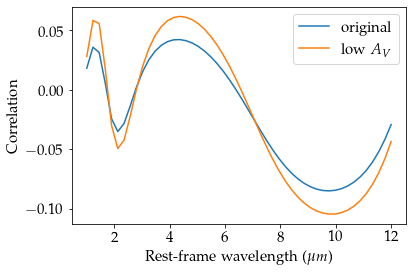

In [64]:
plt.plot(np.linspace(1,12), cors_hb_s, label="original")
plt.plot(np.linspace(1,12), cors_hb_low_av_s, label="low $A_V$")

plt.xlabel("Rest-frame wavelength ($\mu m$)")
plt.ylabel("Correlation")
plt.legend()
plt.savefig("/Users/wul/Desktop/hb_broad_spline.pdf", bbox_inches="tight")

In [40]:
from astropy.table import Table

In [42]:
result = Table.read("/Users/wul/Desktop/Desktop_/out 5/results.fits")

In [53]:
loglbol_x = np.zeros(len(oiii_))

oiii_ans_x = []
for i in range(len(oiii_)):
    s = oiii_[i]
    zp1 = s["z_hw"] + 1
    tb = Table.read(f"/Users/wul/Desktop/Desktop_/out 4/{s['sdss_name']}_best_model.fits")
    wavelength = tb["wavelength"] * 1e-3 / zp1
    dust = tb["agn.SKIRTOR2016_dust"] * zp1
    func = interp1d(wavelength, dust, kind='cubic')
    loglbol_x[i] = np.log10(result[result["id"] == s['sdss_name']]['best.agn.luminosity'][0])
    oiii_ans_x.append(func(np.linspace(1, 12)) / 10**loglbol_x[i])
    

oiii_ans_x = np.array(oiii_ans_x)

In [58]:
cors_hb_x = [parcor([np.log10(oiii_[cond_hb]["ew_broad_hb"]), np.log10(oiii_ans_x[cond_hb,i]), loglbol_x[cond_hb], oiii_[cond_hb]["logbh_hb_vp06"]])[0,1]
for i in range(len(oiii_ans_x[0,:]))]

cors_hb_low_av_x = [parcor([np.log10(oiii_[cond_hb & cond]["ew_broad_hb"]), np.log10(oiii_ans_x[cond_hb & cond,i]),  loglbol_x[cond_hb & cond], oiii_[cond_hb & cond]["logbh_hb_vp06"]])[0,1]
for i in range(len(oiii_ans_x[0,:]))]

In [77]:
def single_bootstrap_x():
    ind = np.random.choice(np.arange(len(oiii_[cond_hb])), len(oiii_[cond_hb]))

    return [parcor([np.log10(oiii_[cond_hb]["ew_broad_hb"])[ind], np.log10(oiii_ans_x[cond_hb,i])[ind], loglbol_x[cond_hb][ind], oiii_[cond_hb]["logbh_hb_vp06"][ind]])[0,1]
for i in range(len(oiii_ans_x[0,:]))]

In [78]:
def single_bootstrap_low_av_x():
    ind = np.random.choice(np.arange(len(oiii_[cond_hb & cond])), len(oiii_[cond_hb & cond]))

    return [parcor([np.log10(oiii_[cond_hb & cond]["ew_broad_hb"])[ind], np.log10(oiii_ans_x[cond_hb & cond,i])[ind], loglbol_x[cond_hb & cond][ind], oiii_[cond_hb & cond]["logbh_hb_vp06"][ind]])[0,1]
for i in range(len(oiii_ans_x[0,:]))]

In [79]:
cors_hb_x_err = np.std([single_bootstrap_x() for i in range(100)], axis=0)
cors_hb_low_av_x_err = np.std([single_bootstrap_low_av_x() for i in range(100)], axis=0)

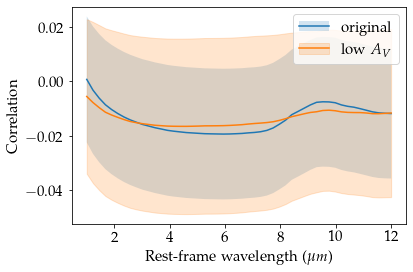

In [81]:
xx = np.linspace(1,12)
a = plot_with_err(xx, cors_hb_x, cors_hb_x_err)

b = plot_with_err(xx, cors_hb_low_av_x, cors_hb_low_av_x_err, color="tab:orange")

plt.legend([a, b], ["original", "low $A_V$"])

plt.xlabel("Rest-frame wavelength ($\mu m$)")
plt.ylabel("Correlation")

plt.savefig("/Users/wul/Desktop/hb_broad_xcigale.pdf", bbox_inches="tight")

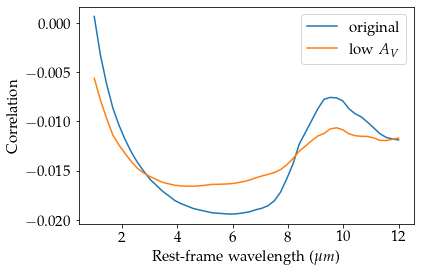

In [59]:
plt.plot(np.linspace(1,12), cors_hb_x, label="original")
plt.plot(np.linspace(1,12), cors_hb_low_av_x, label="low $A_V$")

plt.xlabel("Rest-frame wavelength ($\mu m$)")
plt.ylabel("Correlation")
plt.legend()
plt.savefig("/Users/wul/Desktop/hb_broad_xcigale.pdf", bbox_inches="tight")

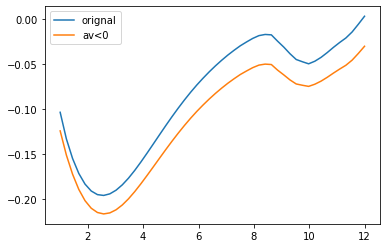

In [16]:
plt.plot(np.linspace(1,12), cors, label="orignal")
plt.plot(np.linspace(1,12), cors_low_av, label="av<0")
plt.legend()

In [130]:
oiii_res_sgd[:,-1]

array([0., 0., 0., ..., 0., 0., 0.])

In [68]:
oiii_res_sgd = np.loadtxt("../output/oiii_single_dust.res")

oiii_res_sgd = oiii_res_sgd[cond_oiii]

logcfs_sgd = np.array([analysis_(i, 12) for i in oiii_res_sgd])
cors_sgd = [parcor([logew, logcfs_sgd[:,i], loglbol, logbh])[0,1] for i in range(50)]

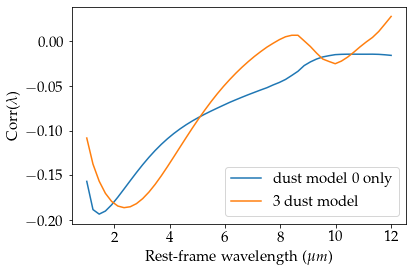

In [134]:
plt.plot(np.linspace(1,12), cors_sgd, label="dust model 0 only")
plt.plot(np.linspace(1,12), cors, label="3 dust model")

plt.xlabel("Rest-frame wavelength ($\mu m$)")
plt.ylabel("Corr($\lambda$)")
plt.legend()

plt.savefig("/Users/wul/Desktop/sgd.pdf", bbox_inches="tight")

In [61]:
cors_sim_sgd = []
sims = []
for i in range(100):
    sims.append(np.loadtxt(f"../_temp/-0.2/oiii{i}.sim"))
for sim in sims:
    sim_ans = np.array([analysis_(i, 12) for i in sim[:,:-1]])
    sim_logew = sim[:,-1]
    sim_loglbol = np.log10(5) + disk_powlaw_(np.log10(0.3)) + sim[:,0]
    sim_cors = [parcor([sim_logew, sim_ans[:,i], sim_loglbol, logbh])[0,1]
                for i in range(50)]
    cors_sim_sgd.append(sim_cors)

/Users/wul/Documents/conda/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: operands could not be broadcast together with shapes (1120,) (1459,) 

In [5]:
# %run analysis.py
oiii_ans = np.array([analysis(i) for i in oiii_res])

In [6]:
logew = np.log10(oiii_["ew_oiii_5007"])
logcf = oiii_ans[:, -1]
logbh = oiii_["logbh_hb_vp06"]
loglbol = np.log10(5) + disk_powlaw_(np.log10(0.3)) + oiii_res[:,0]

In [154]:
logbh[np.where(logbh == 0)] = oiii_[np.where(logbh == 0)]["logbh"]

In [147]:
from scipy.stats import gaussian_kde

In [142]:
def scatter_with_kde(x, y, ax=plt):
    kde = gaussian_kde(np.vstack([x, y]))
    xx, yy = np.meshgrid(np.linspace(min(x), max(x)), np.linspace(min(y), max(y)))

    positions = np.vstack([xx.ravel(), yy.ravel()])
    zz = np.reshape(kde(positions).T, xx.shape)

    ax.scatter(x, y, s=0.5)
    ax.contour(xx, yy, zz, colors='k')

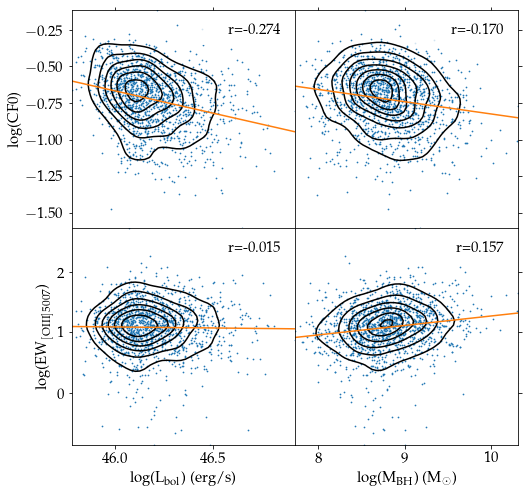

In [155]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
plt.subplots_adjust(wspace=0, hspace=0)

scatter_with_kde(loglbol, logcf, ax=axs[0,0])
axs[0,0].plot([],[],' ',label=f"r={np.corrcoef(loglbol, logcf)[0,1]:.3f}")
axs[0,0].legend(loc="upper right").get_frame().set_linewidth(0.0)
axs[0,0].set_xticklabels([])
axs[0,0].xaxis.tick_top()

k, b = fit(loglbol, logcf)
x = np.array([np.min(loglbol), np.max(loglbol)])
axs[0,0].plot(x, k * x + b, c="tab:orange")


scatter_with_kde(logbh, logcf, ax=axs[0,1])
axs[0,1].plot([],[],' ',label=f"r={np.corrcoef(logbh, logcf)[0,1]:.3f}")
axs[0,1].legend(loc="upper right").get_frame().set_linewidth(0.0)
axs[0,1].set_yticklabels([])
axs[0,1].yaxis.tick_right()
axs[0,1].set_xticklabels([])
axs[0,1].xaxis.tick_top()

tempx, tempy = logbh, logcf
k, b = fit(tempx, tempy)
x = np.array([np.min(tempx), np.max(tempx)])
axs[0,1].plot(x, k * x + b, c="tab:orange")

scatter_with_kde(loglbol, logew, ax=axs[1,0])
axs[1,0].plot([],[],' ',label=f"r={np.corrcoef(loglbol, logew)[0,1]:.3f}")
axs[1,0].legend(loc="upper right").get_frame().set_linewidth(0.0)

tempx, tempy = loglbol, logew
k, b = fit(tempx, tempy)
x = np.array([np.min(tempx), np.max(tempx)])
axs[1,0].plot(x, k * x + b, c="tab:orange")

scatter_with_kde(logbh, logew, ax=axs[1,1])
axs[1,1].plot([],[],' ',label=f"r={np.corrcoef(logbh, logew)[0,1]:.3f}")
axs[1,1].legend(loc="upper right").get_frame().set_linewidth(0.0)
axs[1,1].set_yticklabels([])
axs[1,1].yaxis.tick_right()

tempx, tempy = logbh, logew
k, b = fit(tempx, tempy)
x = np.array([np.min(tempx), np.max(tempx)])
axs[1,1].plot(x, k * x + b, c="tab:orange")

axs[0,0].set_ylabel("log(CF0)")
axs[1,0].set_ylabel("log($\mathrm{EW}_{[\mathrm{OIII}]5007}$)")
axs[1,0].set_xlabel("log(L$_\mathrm{bol}$) (erg/s)")
axs[1,1].set_xlabel("log(M$_\mathrm{BH}$) (M$_\odot$)")

plt.savefig("/Users/wul/Desktop/cors.pdf")

In [95]:
%run model.py

/Users/wul/Documents/Dust/src/model.py:191: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(hspace=0)


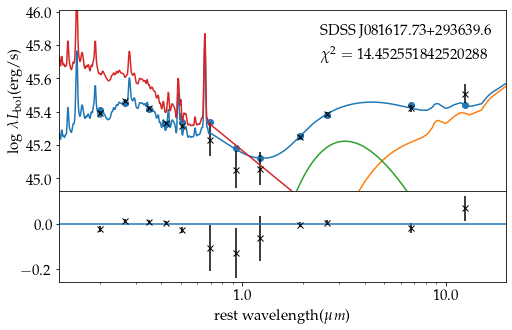

In [225]:
show_for_paper(oiii_[150], oiii_res[150])
plt.savefig("/Users/wul/Desktop/example.pdf")

In [8]:
def analysis_(params_, up): # 1-up um
    optic, nir = components(params_)

    loglbol = np.log10(5 * optic(0.3))
    loglnirs = np.log10(nir(np.linspace(1,up)))
    logcfs = loglnirs - loglbol

    return logcfs

In [9]:
logcfs = np.array([analysis_(i, 12) for i in oiii_res])
cors = [parcor([logew, logcfs[:,i], loglbol, logbh])[0,1] for i in range(50)]

In [9]:
logl_oiii = oiii_["logl_oiii_5007"]

In [8]:
cors_ = [parcor([logl_oiii - loglbol, logcfs[:,i], loglbol, logbh])[0,1] for i in range(50)]

NameError: name 'logl_oiii' is not defined

In [144]:
cor_direct = [np.corrcoef([logew, logcfs[:,i]])[0,1] for i in range(50)]

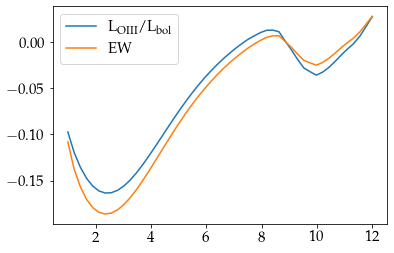

In [230]:
plt.plot(xx, cors_, label="L$_\mathrm{OIII}$/L$_\mathrm{bol}$")
plt.plot(xx, cors, label="EW")
plt.legend()
plt.savefig("/Users/wul/Desktop/l_oiii.pdf")

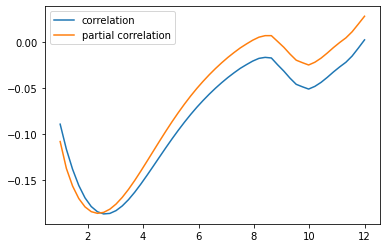

In [18]:
xx = np.linspace(1,12)

plt.plot(xx, cor_direct, label="correlation")
plt.plot(xx, cors, label="partial correlation")
plt.legend()
plt.savefig("/Users/wul/Desktop/direct.pdf")

In [ ]:
plt.plot(cors_, label="L$_\mathrm{OIII}$/L$_\mathrm{bol}$")
plt.plot(cors, label="EW")
plt.legend()
plt.savefig("/Users/wul/Desktop/l_oiii.pdf")

In [139]:
def single_bootstrap():
    ind = np.random.choice(np.arange(len(oiii_)), len(oiii_))

    return [parcor([logew[ind], logcfs[ind, i], loglbol[ind], logbh[ind]])[0,1] for i in range(50)]

In [140]:
cors_std = np.std([single_bootstrap() for i in range(1000)], axis=0)

In [66]:
def single_bootstrap_sgd():
    ind = np.random.choice(np.arange(len(oiii_)), len(oiii_))

    return [parcor([logew[ind], logcfs_sgd[ind,i], loglbol[ind], logbh[ind]])[0,1] for i in range(50)]

In [69]:
cors_sgd_std = np.std([single_bootstrap_sgd() for i in range(1000)], axis=0)

In [135]:
np.savetxt("cors_std", cors_std)

In [6]:
def plot_with_err(x, y, err, ax=plt, **kwargs):
    line, = ax.plot(x, y, **kwargs)
    error = ax.fill_between(x, y + err, y - err, **kwargs, alpha=0.2)
    return line, error

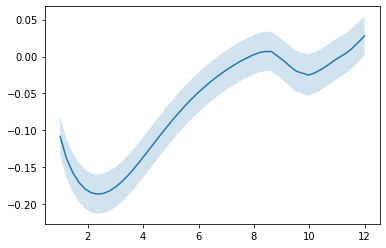

In [103]:
plot_with_err(np.linspace(1,12), cors, cors_std)

In [135]:
corss = []
for n in ['0', '-0.05', '-0.1', '-0.15', '-0.2']:
    res = []
    sims = []
    for i in range(100):
        sims.append(np.loadtxt(f"../temp/{n}/oiii{i}.sim"))
    for sim in sims:
        sim_ans = np.array([analysis_(i, 12) for i in sim[:,:-1]])
        sim_logew = sim[:,-1]
        sim_loglbol = np.log10(5) + disk_powlaw_(np.log10(0.3)) + sim[:,0]
        sim_cors = [parcor([sim_logew, sim_ans[:,i], sim_loglbol, logbh])[0,1]
                    for i in range(50)]
        res.append(sim_cors)
    corss.append(res)

corss = np.array(corss)

In [20]:
_cors = []
sims = []
for i in range(100):
    sims.append(np.loadtxt(f"../_temp/-0.2/oiii{i}.sim"))
for sim in sims:
    sim_ans = np.array([analysis_(i, 12) for i in sim[:,:-1]])
    sim_logew = sim[:,-1]
    sim_loglbol = np.log10(5) + disk_powlaw_(np.log10(0.3)) + sim[:,0]
    sim_cors = [parcor([sim_logew, sim_ans[:,i], sim_loglbol, logbh])[0,1]
                for i in range(50)]
    _cors.append(sim_cors)

In [172]:
np.sum(oiii_res[:,-1] - np.loadtxt(f"../temp/-0.2/oiii68.sim")[:,-2])

-8.0

In [156]:
frac0, frac_x, frac_s = np.loadtxt("frac")

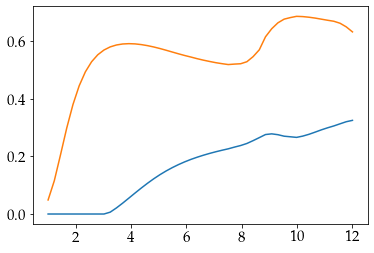

In [173]:
polar = []
dust = []

for data, params in zip(oiii_, oiii_res):
    optic, nir = components(params)
    o3000 = optic(0.3)
    tmp = nir(np.linspace(1,12)) / o3000
    polar.append(tmp*frac0)
    dust.append(tmp)

polar = np.mean(polar, axis=0)
dust = np.mean(dust, axis=0)

plt.plot(np.linspace(1,12), polar)
plt.plot(np.linspace(1,12), dust)

In [163]:
polar

array([ 0.        , -0.00107461, -0.00158592,  0.000494  ,  0.00596644,
        0.01402106,  0.02362079,  0.03445548,  0.04666652,  0.0596302 ,
        0.07183351,  0.08448381,  0.09647067,  0.10914214,  0.119597  ,
        0.1295118 ,  0.13976589,  0.14698068,  0.15470656,  0.16275145,
        0.16724396,  0.17223565,  0.1779023 ,  0.18224884,  0.18558585,
        0.18955642,  0.19331963,  0.19596216,  0.19732742,  0.19601285,
        0.19301156,  0.18815076,  0.18634185,  0.19026099,  0.20087606,
        0.22025749,  0.23482235,  0.24887199,  0.25996203,  0.26702396,
        0.27261332,  0.27486096,  0.27697367,  0.2791516 ,  0.28112173,
        0.28271996,  0.28437438,  0.28567461,  0.28423638,  0.27992064])

In [181]:
cf_polar = []
cf_torus = []
xx = np.linspace(1,12)

for data, params in zip(oiii_, oiii_res):
    optic, nir = components(params)
    lbol = np.log10(5*optic(0.3))
    polar_ = np.log10(integrate.trapz(nir(xx)/xx*frac0, x=xx))
    torus_ = np.log10(integrate.trapz(nir(xx)/xx*(1-frac0), x=xx))
    cf_polar.append(polar_ - lbol)
    cf_torus.append(torus_ - lbol)

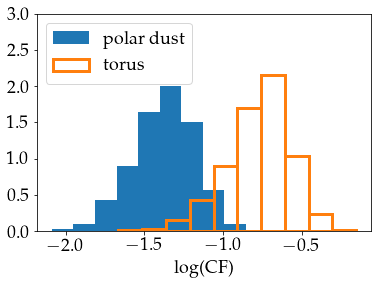

In [201]:
plt.hist(cf_polar, density=True, label="polar dust")
plt.hist(cf_torus, facecolor="None", edgecolor='tab:orange', lw=3, density=True, label="torus")

plt.ylim((0, 3))
plt.legend(loc="upper left")
plt.xlabel("log(CF)")

plt.savefig("/Users/wul/Desktop/cf.pdf", bbox_inches="tight")

(array([0.        , 0.        , 0.        , 0.00685401, 0.00685401,
        0.03427005, 0.05483208, 0.20562029, 0.39067855, 0.68540096,
        1.00753941, 1.69979438, 2.04249486, 2.00822481, 1.22686772,
        0.52090473, 0.09595613, 0.00685401, 0.00685401]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1]),
 <BarContainer object of 19 artists>)

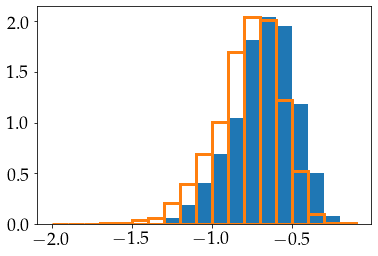

In [206]:
plt.hist(np.log10(10**np.array(cf_polar) + 10**np.array(cf_torus)), density=True, bins=np.arange(-2,0,0.1))
plt.hist(cf_torus, facecolor="None", edgecolor='tab:orange', lw=3, density=True, bins=np.arange(-2,0,0.1))

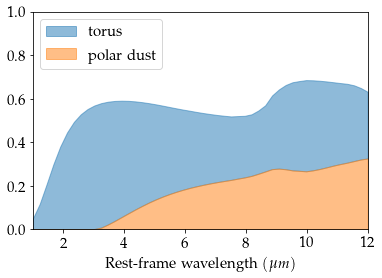

In [174]:
plt.fill_between(np.linspace(1,12), polar, dust, color="tab:blue", alpha=0.5, label="torus")
plt.fill_between(np.linspace(1,12), polar, 0, color="tab:orange", alpha=0.5, label="polar dust")

plt.xlim((1,12))
plt.ylim((0,1))
plt.xlabel("Rest-frame wavelength $(\mu m)$")
plt.legend(loc="upper left")


# plt.savefig("/Users/wul/Desktop/nir5.pdf", bbox_inches="tight")

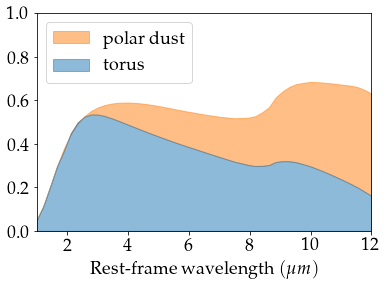

In [180]:
plt.fill_between(np.linspace(1,12), dust - polar, dust, color="tab:orange", alpha=0.5, label="polar dust")
plt.fill_between(np.linspace(1,12), dust - polar, 0, color="tab:blue", alpha=0.5, label="torus")

plt.xlim((1,12))
plt.ylim((0,1))
plt.xlabel("Rest-frame wavelength $(\mu m)$")
plt.legend(loc="upper left")

plt.savefig("/Users/wul/Desktop/nir4.pdf", bbox_inches="tight")

In [208]:
np.savetxt("nir", [dust, polar])

In [23]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 15
})

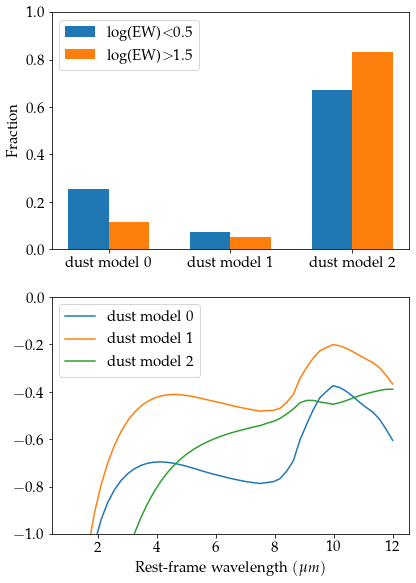

In [31]:
n_low = len(oiii_res[logew<0.5,-1])
n_high = len(oiii_res[logew>1.5,-1])

frac_low = [np.sum(oiii_res[logew<0.5,-1] == i) / n_low for i in range(3)]
frac_high = [np.sum(oiii_res[logew>1.5,-1] == i) / n_high for i in range(3)]

x = np.arange(3)

fig, axs = plt.subplots(2, 1, figsize=(6.4, 9.6))

axs[0].bar(x - 1./6, frac_low, width=1./3, label="log(EW)$<$0.5")
axs[0].bar(x + 1./6, frac_high, width=1./3, label="log(EW)$>$1.5")

axs[0].set_xticks([0, 1, 2]) 
axs[0].set_xticklabels([f"dust model {i}" for i in range(3)])
axs[0].set_ylabel("Fraction")
axs[0].set_ylim((0,1))
axs[0].legend(loc="upper left")

axs[1].plot(xx, np.log10(dust_models[0](xx)), label="dust model 0")
axs[1].plot(xx, np.log10(dust_models[1](xx)), label="dust model 1")
axs[1].plot(xx, np.log10(dust_models[2](xx)), label="dust model 2")
axs[1].set_ylim((-1,0))
axs[1].set_xlabel("Rest-frame wavelength $(\mu m)$")
axs[1].legend()

plt.savefig("/Users/wul/Desktop/cold_dust.pdf")

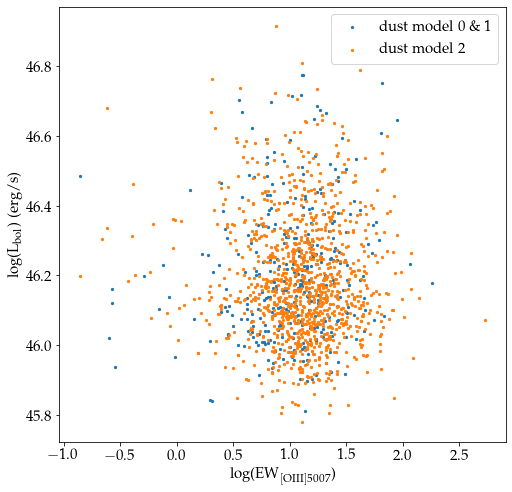

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(logew[oiii_res[:,-1] != 2], loglbol[oiii_res[:,-1] != 2], s=5, label="dust model 0 \& 1")
plt.scatter(logew[oiii_res[:,-1] == 2], loglbol[oiii_res[:,-1] == 2], s=5, label="dust model 2")
plt.xlabel("log(EW$_{\mathrm{[OIII]}5007}$)")
plt.ylabel("log(L$_\mathrm{bol}$) (erg/s)")
plt.legend()

plt.savefig("/Users/wul/Desktop/cold_dust_scatter.pdf")

(array([  9.,   9.,  20.,  83., 316., 618., 319.,  78.,   6.,   1.]),
 array([-0.85951336, -0.50031551, -0.14111766,  0.21808019,  0.57727805,
         0.9364759 ,  1.29567375,  1.65487161,  2.01406946,  2.37326731,
         2.73246517]),
 <BarContainer object of 10 artists>)

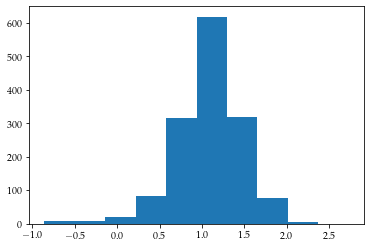

In [174]:
plt.hist(logew)

In [62]:
cors_sim_sgd, cors_sim_sgd_err = np.loadtxt("cors_sim_sgd")

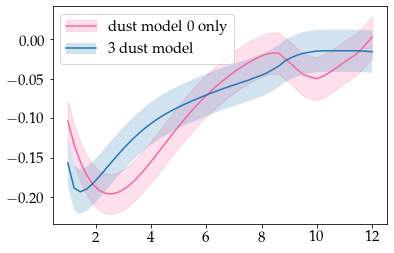

In [70]:
a = plot_with_err(xx, cors, cors_std, color=color(0.5))

b = plot_with_err(xx, cors_sgd, cors_sgd_std)

plt.legend([a, b], ["dust model 0 only", "3 dust model"])

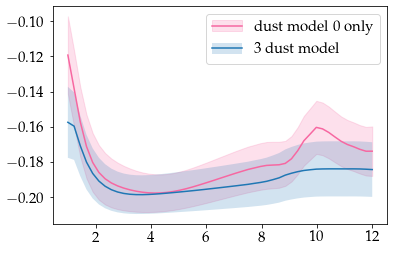

In [64]:
a = plot_with_err(xx, np.mean(_cors, axis=0), np.std(_cors, axis=0), color=color(0.5))

b = plot_with_err(xx, cors_sim_sgd, cors_sim_sgd_err)

plt.legend([a, b], ["dust model 0 only", "3 dust model"])

plt.savefig("/Users/wul/Desktop/flex.pdf")

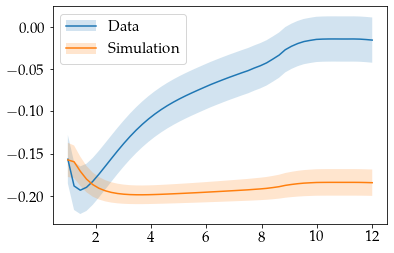

In [71]:
a = plot_with_err(xx, cors_sgd, cors_sgd_std)

b = plot_with_err(xx, cors_sim_sgd, cors_sim_sgd_err)

plt.legend([a, b], ["Data", "Simulation"])

In [137]:
from matplotlib import cm

color = cm.get_cmap("RdPu")

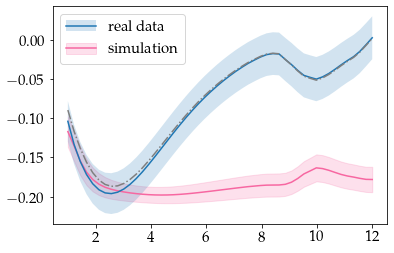

In [145]:
xx = np.linspace(1,12)

# plot_with_err(xx, np.mean(corss[0], axis=0), np.std(corss[0], axis=0), color=color(0.9))
# plot_with_err(xx, np.mean(corss[1], axis=0), np.std(corss[1], axis=0), color=color(0.8))
# plot_with_err(xx, np.mean(corss[2], axis=0), np.std(corss[2], axis=0), color=color(0.7))
# plot_with_err(xx, np.mean(corss[3], axis=0), np.std(corss[3], axis=0), color=color(0.6))
simulation = plot_with_err(xx, np.mean(corss[4], axis=0), np.std(corss[4], axis=0), color=color(0.5), label="simulation")


real_data = plot_with_err(np.linspace(1,12), cors, cors_std, label="real data")


plt.plot(xx, cor_direct, color="tab:gray", linestyle="-.")

plt.legend([real_data, simulation], ["real data", "simulation"])

In [104]:
x = []
y = []
yerr = []

for data, params_ in zip(oiii_, oiii_res):
    rsr, wavelength, lum, lum_unc = prepare_data(data)
    *params, residual, mod = params_
    dust_model = dust_models[int(mod)]

    bands = np.log10([get_band(get_sed(dust_model, params))(rsr, wav) for rsr, wav in zip(rsr, wavelength)])

    x.extend(wavelength)
    y.extend(lum - bands)
    yerr.extend(lum_unc)

In [125]:
xx[np.where(cors == max(cors[:40]))], np.arange(50)[np.where(cors == max(cors[:40]))]

(array([8.63265306]), array([34]))

In [126]:
xx[np.where(cors == min(cors[:40]))], np.arange(50)[np.where(cors == min(cors[:40]))]

(array([2.34693878]), array([6]))

In [133]:
from scipy.optimize import lsq_linear

def fit(xs, ys):
    A = np.ones((len(xs), 2))
    A[:,0] = xs
    res = lsq_linear(A, ys)
    return res.x

In [22]:
from scipy.odr import ODR, Model, Data

def fit(xs, ys):
    res = ODR(
        Data(xs, ys, wd=1./np.std(xs)**2, we=1./np.std(ys)**2),
        Model(lambda kb, x: kb[0]*x + kb[1]),
        beta0=[1.,2.]
    ).run()
    return res.beta

In [23]:
def fit_bis(xs, ys):
    A = np.ones((len(xs), 2))
    A[:,0] = xs
    k1, b1 = lsq_linear(A, ys).x

    A = np.ones((len(ys), 2))
    A[:,0] = ys
    k2, b2 = lsq_linear(A, xs).x
    
    ratio = np.std(xs) / np.std(ys)

    theta1 = np.arctan(k1*ratio)
    theta2 = np.arctan(1/k2*ratio)
    k = np.tan((theta1 + theta2) / 2) / ratio

    y0 = (k1*b2 + b1) / (1 - k1*k2)
    x0 = k2*y0 + b2
    b = y0 - k*x0

    return k, b

In [136]:

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 18
})

In [147]:
np.linspace(1,12)[6]

2.3469387755102042

In [148]:
np.linspace(1,12)[34]

8.63265306122449

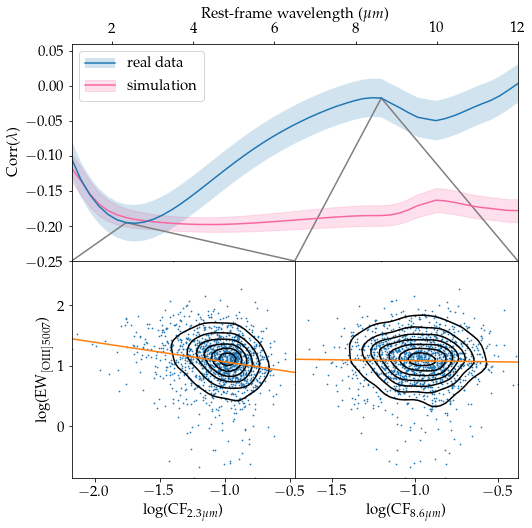

In [148]:
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

xx = np.linspace(1,12)


ax1.set_xlim((1,12))
ax1.set_ylim((-0.25, 0.06))
x0, y0 = np.linspace(1,12)[6], cors[6]
x1, y1 = np.linspace(1,12)[34], cors[34]
ax1.plot([1, x0], [-0.25, y0], c="tab:gray")
ax1.plot([6.5, x0], [-0.25, y0], c="tab:gray")
ax1.plot([12, x1], [-0.25, y1], c="tab:gray")
ax1.plot([6.5, x1], [-0.25, y1], c="tab:gray")

simulation = plot_with_err(xx, np.mean(corss[4], axis=0), np.std(corss[4], axis=0), color=color(0.5), label="simulation", ax=ax1)

real_data = plot_with_err(np.linspace(1,12), cors, cors_std, label="real data", ax=ax1)
ax1.legend([real_data, simulation], ["real data", "simulation"])

ax1.set_ylabel("Corr($\lambda$)")
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.set_xlabel("Rest-frame wavelength ($\mu m$)")

scatter_with_kde(logcfs[:,6], logew, ax=ax3)
k, b = fit(logcfs[:,6], logew)
x = np.array([np.min(logcfs[:,6]), np.max(logcfs[:,6])])
ax3.plot(x, k * x + b, c="tab:orange")
ax3.set_xlabel("log(CF$_{2.3\mu m}$)")
ax3.set_ylabel("log(EW$_{\mathrm{[OIII]5007}}$)")
scatter_with_kde(logcfs[:,34], logew, ax=ax4)
k, b = fit(logcfs[:,34], logew)
x = np.array([np.min(logcfs[:,34]), np.max(logcfs[:,34])])
ax4.plot(x, k * x + b, c="tab:orange")
ax4.set_xlabel("log(CF$_{8.6\mu m}$)")
ax4.set_yticks([])


plt.subplots_adjust(wspace=0, hspace=0)


# plt.savefig("/Users/wul/Desktop/curve.pdf")

In [150]:
cors_x, cors_std_x, cors_x_ = np.loadtxt("cors_x")
cors_s, cors_std_s, cors_s_ = np.loadtxt("cors_s")

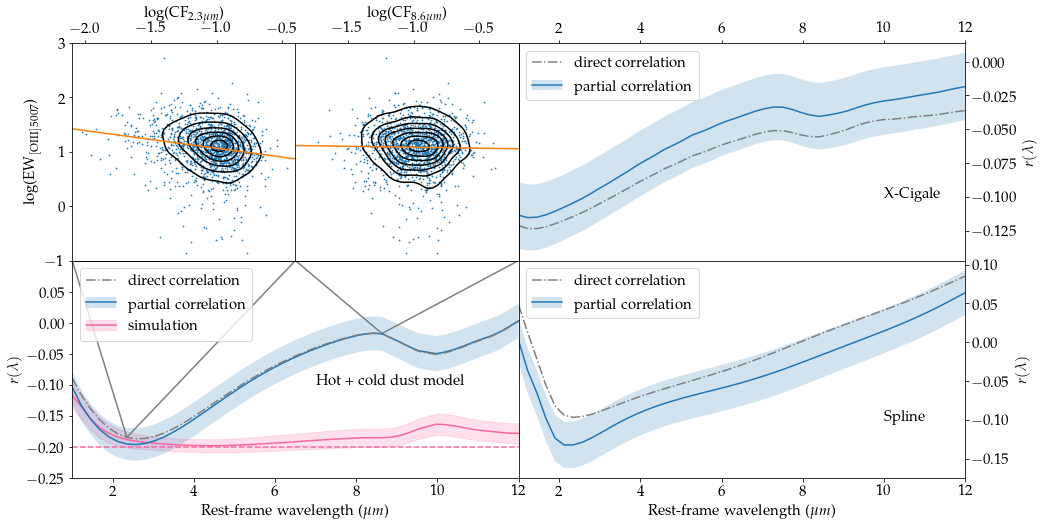

In [176]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(223)
ax2 = plt.subplot(222)
ax3 = plt.subplot(224)
axl = plt.subplot(241)
axr = plt.subplot(242)

xx = np.linspace(1,12)


ax1.set_xlim((1,12))
ax2.set_xlim((1,12))
ax3.set_xlim((1,12))
ax1.set_ylim((-0.25, 0.1))
x0, y0 = np.linspace(1,12)[6], cor_direct[6]
x1, y1 = np.linspace(1,12)[34], cor_direct[34]
ax1.plot([1, x0], [0.1, y0], c="tab:gray")
ax1.plot([6.5, x0], [0.1, y0], c="tab:gray")
ax1.plot([12, x1], [0.1, y1], c="tab:gray")
ax1.plot([6.5, x1], [0.1, y1], c="tab:gray")

simulation = plot_with_err(xx, np.mean(corss[4], axis=0), np.std(corss[4], axis=0), color=color(0.5), label="simulation", ax=ax1)

real_data = plot_with_err(np.linspace(1,12), cors, cors_std, label="real data", ax=ax1)

real_data_direct, = ax1.plot(np.linspace(1,12), cor_direct, color="tab:gray", linestyle="-.")

intrinsic = ax1.axhline(-0.2, color=color(0.5), linestyle="--")


ax1.legend([real_data_direct, real_data, simulation], # intrinsic], 
    ["direct correlation", "partial correlation", "simulation"]) #, "intrinsic correlation"])

ax1.set_ylabel("$r(\lambda)$")
ax2.set_ylabel("$r(\lambda)$")
ax3.set_ylabel("$r(\lambda)$")
# ax1.xaxis.tick_top()
# ax1.xaxis.set_label_position('top')
ax1.set_yticks(np.arange(-0.25, 0.1, 0.05))

ax1.set_xlabel("Rest-frame wavelength ($\mu m$)")
ax3.set_xlabel("Rest-frame wavelength ($\mu m$)")

ax2.xaxis.tick_top()
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()

ax3.yaxis.set_label_position('right')
ax3.yaxis.tick_right()

ax1.text(7, -0.1, "Hot + cold dust model")
ax2.text(10, -0.1, "X-Cigale")
ax3.text(10, -0.1, "Spline")


xc = plot_with_err(np.linspace(1,12), cors_x, cors_std_x, label="partial correlation", ax=ax2)

xc_direct, = ax2.plot(np.linspace(1,12), cors_x_, color="tab:gray", linestyle="-.", label="direct correlation")

ax2.legend([xc_direct, xc], 
    ["direct correlation", "partial correlation"])

sp = plot_with_err(np.linspace(1,12), cors_s, cors_std_s, label="partial correlation", ax=ax3)

sp_direct, = ax3.plot(np.linspace(1,12), cors_s_, color="tab:gray", linestyle="-.", label="direct correlation")

ax3.legend([sp_direct, sp], 
    ["direct correlation", "partial correlation"], loc="upper left")


axl.set_xlim((-2.1, -0.4))
axr.set_xlim((-1.9,-0.2))
axl.set_ylim(-1,3)
axr.set_ylim(-1,3)

scatter_with_kde(logcfs[:,6], logew, ax=axl)
k, b = fit(logcfs[:,6], logew)
x = np.array([-2.1, -0.2])
axl.plot(x, k * x + b, c="tab:orange")
axl.set_xlabel("log(CF$_{2.3\mu m}$)")
axl.set_ylabel("log(EW$_{\mathrm{[OIII]5007}}$)")
axl.xaxis.set_label_position('top')
axl.xaxis.tick_top()
scatter_with_kde(logcfs[:,34], logew, ax=axr)
k, b = fit(logcfs[:,34], logew)
axr.plot(x, k * x + b, c="tab:orange")
axr.set_xlabel("log(CF$_{8.6\mu m}$)")
axr.set_yticks([])
axr.xaxis.set_label_position('top')
axr.xaxis.tick_top()



plt.subplots_adjust(wspace=0, hspace=0)


plt.savefig("/Users/wul/Desktop/curve.pdf")

In [170]:
sim0 = np.loadtxt("../temp/-0.2/oiii0.sim")
sim0_ans = np.array([analysis_(i, 12) for i in sim[:,:-1]])
sim0_logew = sim[:,-1]

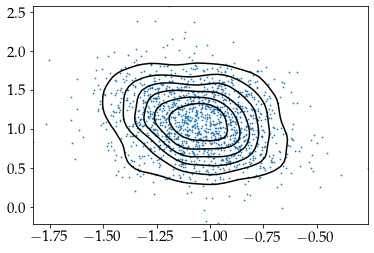

In [171]:
scatter_with_kde(sim0_ans[:,6], sim0_logew)

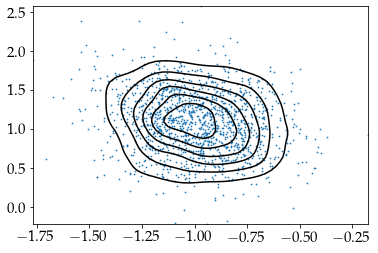

In [172]:
scatter_with_kde(sim0_ans[:,34], sim0_logew)